## NYC Green Taxi Data for Sep 2016 Analysis

#### Author: George J Varghese (george.j.varghese@schwab.com)

## Objective

Analyze New York City Taxi and Limousine commission (Sep2016)

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page (Data Source)

## Data Dictionary

https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

* VendorID:  A code indicating the LPEP provider that provided the record.
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.

* lpep_pickup_datetime:  The date and time when the meter was engaged.

* lpep_dropoff_datetime: The date and time when the meter was disengaged.

* Passenger_count: The number of passengers in the vehicle.
This is a driver-entered value.

* Trip_distance:  The elapsed trip distance in miles reported by the taximeter.

* PULocationID:  TLC Taxi Zone in which the taximeter was engaged

* DOLocationID:  TLC Taxi Zone in which the taximeter was disengaged

* RateCodeID: The final rate code in effect at the end of the trip.
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride

* Store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip

* Payment_type: A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

* Fare_amount: The time-and-distance fare calculated by the meter.

* Extra:  Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges.

* MTA_tax: $0.50 MTA tax that is automatically triggered based on the metered
rate in use.

* Improvement_surcharge:  $0.30 improvement surcharge assessed on hailed trips at the flag
drop. The improvement surcharge began being levied in 2015.

* Tip_amount: Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.

* Tolls_amount: Total amount of all tolls paid in trip.

* Total_amount: The total amount charged to passengers. Does not include cash tips

* Trip_Type : A code indicating whether the trip was a street-hail or a dispatch
that is automatically assigned based on the metered rate in use but
can be altered by the driver.
1= Street-hail
2= Dispatch


## Objective

* Perform basic exploratory analysis on the data and provide results
* Plot a histogram of the trip distance and your inferences on the same.
* Report mean and median trip distance grouped by the hour of the day (based on pick up/ drop off time)
* What insights stand out based on your analysis?

## 1.Initial Analysis , Structure of the Data

### Importing Python Libraries

In [305]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings

warnings.filterwarnings("ignore")


# this will help in making the Python code more structured automatically
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Reading the dataset

In [306]:
# loading the dataset
trip= pd.read_csv("green_tripdata_2016-09.csv")


<IPython.core.display.Javascript object>

### Finding the number of Columns and Rows

In [307]:
# checking the shape of the data
print(f"There are {trip.shape[0]} rows and {trip.shape[1]} columns.")

There are 1048574 rows and 19 columns.


<IPython.core.display.Javascript object>

In [308]:
# Copying the data to another variable to avoid any changes to original data
data = trip.copy()

<IPython.core.display.Javascript object>

### Viewing the first / last  5 rows of the dataset

In [309]:
# Viewing the first 5 rows of the dataset
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,9/1/2016 0:58,9/1/2016 1:11,N,1,92,82,1,3.34,12.5,0.5,0.5,1.00,0.0,NaN,0.3,14.80,1,1.0
1,2,9/1/2016 0:49,9/1/2016 1:05,N,1,83,92,2,3.78,14.5,0.5,0.5,0.00,0.0,NaN,0.3,15.80,2,1.0
2,2,9/1/2016 0:06,9/1/2016 0:15,N,1,93,223,1,4.84,15.0,0.5,0.5,0.00,0.0,NaN,0.3,16.30,2,1.0
3,2,9/1/2016 0:28,9/1/2016 1:07,N,4,93,265,1,28.26,119.0,0.5,0.5,30.08,0.0,NaN,0.3,150.38,1,1.0
4,2,9/1/2016 0:17,9/1/2016 0:27,N,1,130,63,1,3.50,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0


<IPython.core.display.Javascript object>

In [310]:
# Viewing the last 5 rows of the dataset
data.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
1048569,2,9/28/2016 11:09,9/28/2016 11:17,N,1,74,42,1,1.20,7.0,0.0,0.5,1.95,0.0,NaN,0.3,9.75,1,1.0
1048570,2,9/28/2016 11:07,9/28/2016 11:20,N,1,33,45,1,2.23,11.0,0.0,0.5,0.00,0.0,NaN,0.3,11.80,1,1.0
1048571,2,9/28/2016 11:38,9/28/2016 12:06,N,1,33,70,1,11.56,33.5,0.0,0.5,0.00,0.0,NaN,0.3,34.30,2,1.0
1048572,2,9/28/2016 11:12,9/28/2016 11:21,N,1,196,196,1,2.11,9.5,0.0,0.5,0.00,0.0,NaN,0.3,10.30,2,1.0
1048573,2,9/28/2016 11:57,9/28/2016 11:58,N,1,112,255,1,0.34,3.0,0.0,0.5,0.00,0.0,NaN,0.3,3.80,2,1.0


<IPython.core.display.Javascript object>

### Check for Structure of the Data, Duplicate rows and Null values

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1048574 non-null  int64  
 1   lpep_pickup_datetime   1048574 non-null  object 
 2   lpep_dropoff_datetime  1048574 non-null  object 
 3   store_and_fwd_flag     1048574 non-null  object 
 4   RatecodeID             1048574 non-null  int64  
 5   PULocationID           1048574 non-null  int64  
 6   DOLocationID           1048574 non-null  int64  
 7   passenger_count        1048574 non-null  int64  
 8   trip_distance          1048574 non-null  float64
 9   fare_amount            1048574 non-null  float64
 10  extra                  1048574 non-null  float64
 11  mta_tax                1048574 non-null  float64
 12  tip_amount             1048574 non-null  float64
 13  tolls_amount           1048574 non-null  float64
 14  ehail_fee         

<IPython.core.display.Javascript object>

In [312]:
data.duplicated().sum()

109

<IPython.core.display.Javascript object>

Observation
* Since there are only a small percentage of rows , which are duplicated, we are not cleaning up them for this exercise.

In [313]:
# checking for missing values
data.isna().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1048574
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      1
dtype: int64

<IPython.core.display.Javascript object>

Observation
* ehail_fee column is NULL for all the rows in the dataset.
* trip_type has one row with NULL value

### Statistical Summary of the data

In [314]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,1048574.0,1.794415,0.404129,1.00,2.00,2.00,2.00,2.00
RatecodeID,1048574.0,1.090367,0.591207,1.00,1.00,1.00,1.00,99.00
PULocationID,1048574.0,115.022296,76.743564,1.00,49.00,92.00,173.00,265.00
DOLocationID,1048574.0,129.932403,77.303966,1.00,62.00,129.00,194.00,265.00
passenger_count,1048574.0,1.343452,1.002538,0.00,1.00,1.00,1.00,9.00
trip_distance,1048574.0,2.860162,3.002495,0.00,1.04,1.87,3.55,227.44
fare_amount,1048574.0,12.418826,10.908991,-300.09,6.50,9.50,15.00,3361.00
extra,1048574.0,0.351018,0.378848,-4.50,0.00,0.50,0.50,4.50
mta_tax,1048574.0,0.486919,0.085179,-0.50,0.50,0.50,0.50,0.50
tip_amount,1048574.0,1.221026,2.344198,-11.46,0.00,0.00,2.00,289.00


<IPython.core.display.Javascript object>

Observation
* Vendor ID has 2 unique values
* PU LocationId and DO LocationID ranges from 1 to 265
* Passenger Count ranges from 0 to 9
* Trip Distance ranges from 0 to 227 
* Some of the amount values has negative values.. which needs further investigation
* There are 5 different payment types, 2 different trip types
* Further Analysis of the relevant columns are provided below. 


### Check the unique values in some Categorical columns

In [315]:
# Let's see unique values in categorical columns
cols = ["VendorID", "RatecodeID", "passenger_count", "payment_type", "trip_type"]

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), data[col].unique())
    print("-" * 100)

Unique values in the column 'VendorID' are 

 [2 1]
----------------------------------------------------------------------------------------------------
Unique values in the column 'RatecodeID' are 

 [ 1  4  5  3  2  6 99]
----------------------------------------------------------------------------------------------------
Unique values in the column 'passenger_count' are 

 [1 2 5 3 4 6 0 7 8 9]
----------------------------------------------------------------------------------------------------
Unique values in the column 'payment_type' are 

 [1 2 4 3 5]
----------------------------------------------------------------------------------------------------
Unique values in the column 'trip_type' are 

 [ 1.  2. nan]
----------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

### Summary of the dataset

* DataSet are 1048574 rows and 19 columns
* DataSet has 10 columns of datatype float64, 6 columns of datatype int64 and 3 columns of datatype object.
* There are 109 Duplicated rows
* ehail_fee column is NULL for all the rows in the dataset.
* trip_type has one row with NULL value
* lpep_pickup_datetime and lpep_dropoff_datetime are objects storing date and time, so we need to split the values in hours etc for further analysis (New feature)
* We also need to add new features to dataset to define certain id columns by mapping to their description from dataset.

## 2. Feature Engg.

### Dropping the row where trip_type=NaN

In [316]:
data.dropna(subset=["trip_type"], inplace=True)

<IPython.core.display.Javascript object>

In [317]:
# checking for missing values
data.isna().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1048573
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      0
dtype: int64

<IPython.core.display.Javascript object>

Observation
* Except ehail_fee, there are no other NULL values in the dataset.


### Mapping specific ID Columns to meaningful names (as obtained from Data Dictionary)

In [318]:
# Mapping VendorID, RatecodeID, Payment-type,trip_type to their descriptive values from Data Dictionary
vendormap = {1: "Creative Mobile Technologies", 2: "Verifone Inc"}
ratecodemap = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated fare",
    6: "Group Ride",
}
paymenttypemap = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip",
}
triptypemap = {1: "Street-hail", 2: "Dispatch"}

# Adding new columns; Vendor_Name, Rate_Code, Payment_Type_Desc, Trip_Type_Desc
data["Vendor_Name"] = data["VendorID"].map(vendormap)
data["Rate_Code"] = data["RatecodeID"].map(ratecodemap)
data["Payment_Type_Desc"] = data["payment_type"].map(paymenttypemap)
data["Trip_Type_Desc"] = data["trip_type"].map(triptypemap)

# Viewing data to see the newly added columns
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,Vendor_Name,Rate_Code,Payment_Type_Desc,Trip_Type_Desc
0,2,9/1/2016 0:58,9/1/2016 1:11,N,1,92,82,1,3.34,12.5,...,0.0,NaN,0.3,14.80,1,1.0,Verifone Inc,Standard rate,Credit card,Street-hail
1,2,9/1/2016 0:49,9/1/2016 1:05,N,1,83,92,2,3.78,14.5,...,0.0,NaN,0.3,15.80,2,1.0,Verifone Inc,Standard rate,Cash,Street-hail
2,2,9/1/2016 0:06,9/1/2016 0:15,N,1,93,223,1,4.84,15.0,...,0.0,NaN,0.3,16.30,2,1.0,Verifone Inc,Standard rate,Cash,Street-hail
3,2,9/1/2016 0:28,9/1/2016 1:07,N,4,93,265,1,28.26,119.0,...,0.0,NaN,0.3,150.38,1,1.0,Verifone Inc,Nassau or Westchester,Credit card,Street-hail
4,2,9/1/2016 0:17,9/1/2016 0:27,N,1,130,63,1,3.50,12.0,...,0.0,NaN,0.3,15.96,1,1.0,Verifone Inc,Standard rate,Credit card,Street-hail


<IPython.core.display.Javascript object>

### Splitting the datetime component to Year, Month, Date and Hour for further Analysis

In [319]:
# Adding new columns PICKUP (PU) year, month, date and hour
pu_year = []
pu_month = []
pu_date = []
pu_hour = []
for x in data["lpep_pickup_datetime"]:
    pu_month.append(
        int(x.split("/")[0])
    )  # extraction of year from date column and appending into list
    pu_date.append(
        int(x.split("/")[1])
    )  # extraction of month from date column and appending into list
    pu_year.append(
        int(x.split("/")[2].split(" ")[0])
    )  # extraction of date of the month from date column and appending into list
    pu_hour.append(
        int(x.split("/")[2].split(" ")[1].split(":")[0])
    )  # extraction of hour of that day from date column and appending into list

data["pu_year"] = pu_year
data["pu_month"] = pu_month
data["pu_date"] = pu_date
data["pu_hour"] = pu_hour
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,Vendor_Name,Rate_Code,Payment_Type_Desc,Trip_Type_Desc,pu_year,pu_month,pu_date,pu_hour
0,2,9/1/2016 0:58,9/1/2016 1:11,N,1,92,82,1,3.34,12.5,...,1,1.0,Verifone Inc,Standard rate,Credit card,Street-hail,2016,9,1,0
1,2,9/1/2016 0:49,9/1/2016 1:05,N,1,83,92,2,3.78,14.5,...,2,1.0,Verifone Inc,Standard rate,Cash,Street-hail,2016,9,1,0
2,2,9/1/2016 0:06,9/1/2016 0:15,N,1,93,223,1,4.84,15.0,...,2,1.0,Verifone Inc,Standard rate,Cash,Street-hail,2016,9,1,0
3,2,9/1/2016 0:28,9/1/2016 1:07,N,4,93,265,1,28.26,119.0,...,1,1.0,Verifone Inc,Nassau or Westchester,Credit card,Street-hail,2016,9,1,0
4,2,9/1/2016 0:17,9/1/2016 0:27,N,1,130,63,1,3.50,12.0,...,1,1.0,Verifone Inc,Standard rate,Credit card,Street-hail,2016,9,1,0


<IPython.core.display.Javascript object>

In [320]:
# Adding new columns DROPOFF (DO) year, month, date and hour
do_year = []
do_month = []
do_date = []
do_hour = []
for x in data["lpep_dropoff_datetime"]:
    do_month.append(
        int(x.split("/")[0])
    )  # extraction of year from date column and appending into list
    do_date.append(
        int(x.split("/")[1])
    )  # extraction of month from date column and appending into list
    do_year.append(
        int(x.split("/")[2].split(" ")[0])
    )  # extraction of date of the month from date column and appending into list
    do_hour.append(
        int(x.split("/")[2].split(" ")[1].split(":")[0])
    )  # extraction of hour of that day from date column and appending into list

data["do_year"] = do_year
data["do_month"] = do_month
data["do_date"] = do_date
data["do_hour"] = do_hour
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Payment_Type_Desc,Trip_Type_Desc,pu_year,pu_month,pu_date,pu_hour,do_year,do_month,do_date,do_hour
0,2,9/1/2016 0:58,9/1/2016 1:11,N,1,92,82,1,3.34,12.5,...,Credit card,Street-hail,2016,9,1,0,2016,9,1,1
1,2,9/1/2016 0:49,9/1/2016 1:05,N,1,83,92,2,3.78,14.5,...,Cash,Street-hail,2016,9,1,0,2016,9,1,1
2,2,9/1/2016 0:06,9/1/2016 0:15,N,1,93,223,1,4.84,15.0,...,Cash,Street-hail,2016,9,1,0,2016,9,1,0
3,2,9/1/2016 0:28,9/1/2016 1:07,N,4,93,265,1,28.26,119.0,...,Credit card,Street-hail,2016,9,1,0,2016,9,1,1
4,2,9/1/2016 0:17,9/1/2016 0:27,N,1,130,63,1,3.50,12.0,...,Credit card,Street-hail,2016,9,1,0,2016,9,1,0


<IPython.core.display.Javascript object>

## 2. Exploratory Data Analysis (EDA)

In [321]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [322]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

## Univariate Analysis

### Observation on Vendor Data

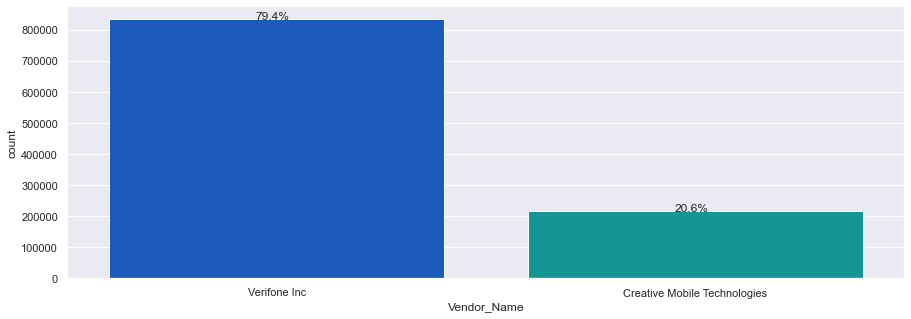

<IPython.core.display.Javascript object>

In [323]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Vendor_Name"], palette="winter")
perc_on_bar(ax, data["Vendor_Name"])

Observation
* Approximately 80% of data came from Verifone Inc, while 20% came from Creative Mobile Technologies

### Observation on RateCode Data

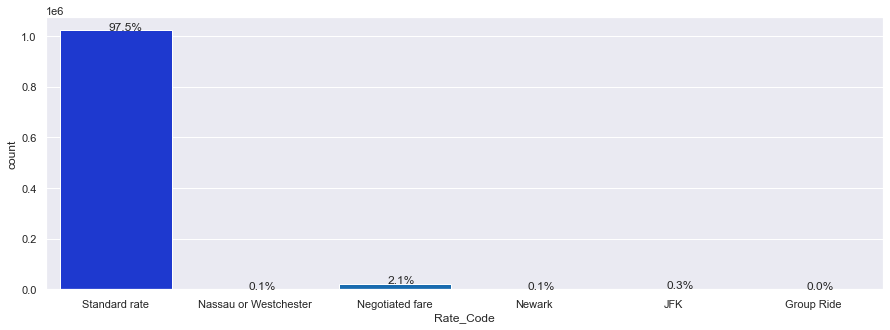

<IPython.core.display.Javascript object>

In [324]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Rate_Code"], palette="winter")
perc_on_bar(ax, data["Rate_Code"])

Observation
* Approximately 97.5% of data came from Standard rate, 2% are Negotiated fare, other categories are very negilible

### Observation on Passenger Count

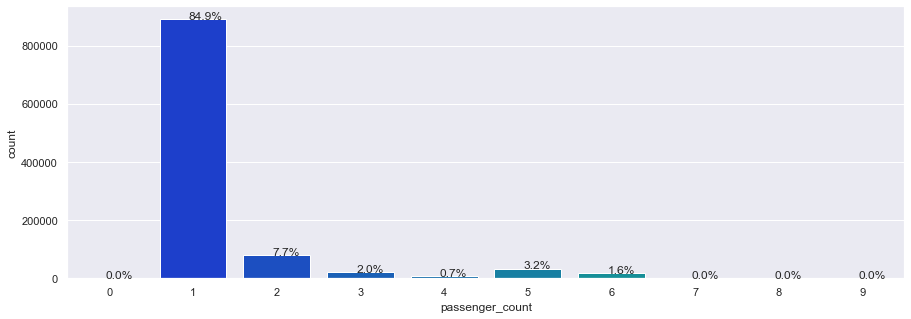

<IPython.core.display.Javascript object>

In [325]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["passenger_count"], palette="winter")
perc_on_bar(ax, data["passenger_count"])

Observation
* Single passenger form 85% of data, 2 passenger count comes 7.8% , 5 passenger counts 3% , rest are very neglilible

### Observation on Payment Type

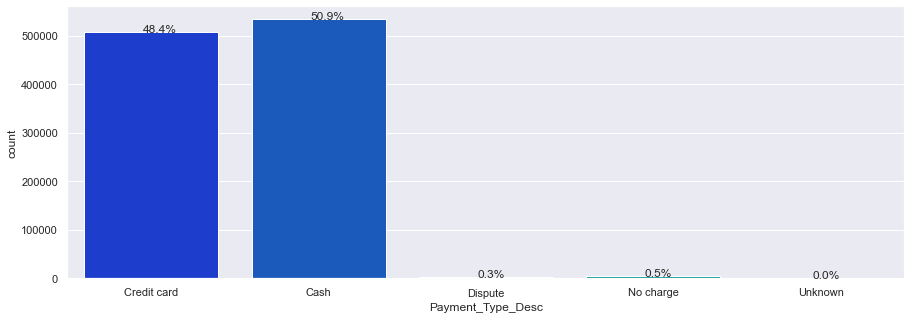

<IPython.core.display.Javascript object>

In [326]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Payment_Type_Desc"], palette="winter")
perc_on_bar(ax, data["Payment_Type_Desc"])

Observation
* CreditCard payments comprise of 48%, Cash payments are at 50%, rest are very negilible.

### Observation on Trip Type

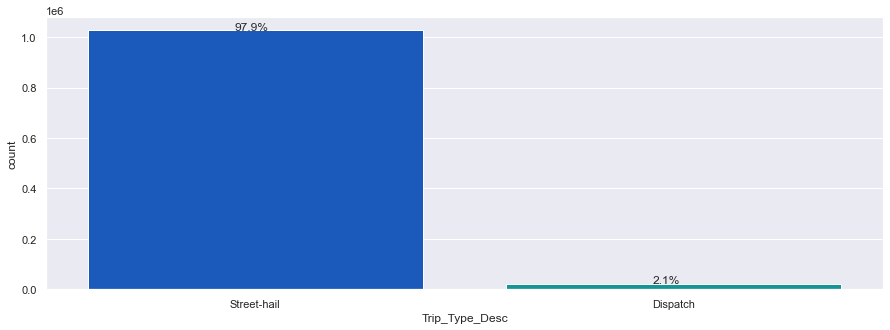

<IPython.core.display.Javascript object>

In [327]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Trip_Type_Desc"], palette="winter")
perc_on_bar(ax, data["Trip_Type_Desc"])

Observation
* About 98% of trips are 'Street-Hail', rest 2% are Dispatched.

### Observation of Pickup and DropOff Hours

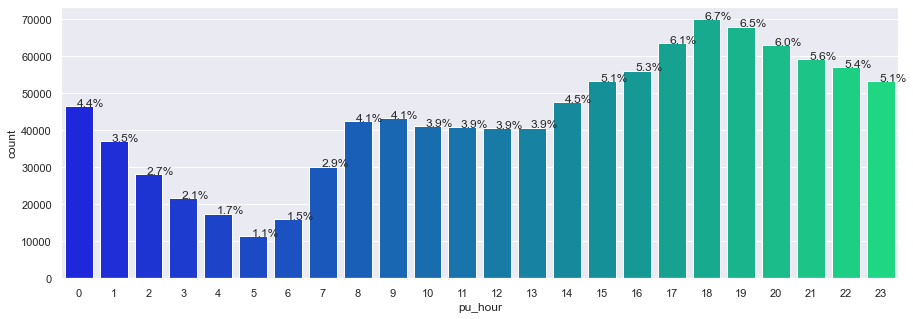

<IPython.core.display.Javascript object>

In [328]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["pu_hour"], palette="winter")
perc_on_bar(ax, data["pu_hour"])

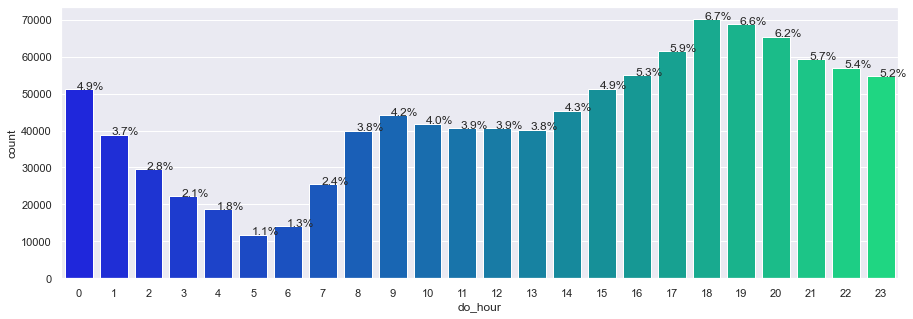

<IPython.core.display.Javascript object>

In [329]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["do_hour"], palette="winter")
perc_on_bar(ax, data["do_hour"])

Observation
* Pickup and Dropoff hours form a similar pattern, the activity is low during early morning hours (~ 1%), it increases towards the morning working hours (~ 4%), it peaks to the maximum between 5-8 PM (~ upto 7%)

### Question 2. Observation and Histogram on trip distance

In [330]:
data["trip_distance"].describe().round(2)

count    1048573.00
mean           2.86
std            3.00
min            0.00
25%            1.04
50%            1.87
75%            3.55
max          227.44
Name: trip_distance, dtype: float64

<IPython.core.display.Javascript object>

From the summary statistics for trip distance, following can be inferred for a dataset of 10458573 rows

* Average of trip_distance is 2.86 miles, Median value is 1.87 miles
* Minimum Value of trip distance is 0  and Max value is 227.44 miles
* Value as '0' for trip_distance could be a data issue or rounding value to 0.
* There is huge difference between max trip distance value(227.44)  and the 75% quantile value (3.55). 
* This could be due to the presence of outliers.


In [331]:
data["trip_distance"].skew()

4.0112020289773485

<IPython.core.display.Javascript object>

The Skew value of 4 is showing that this is a Highly Skewed Distribution

In [332]:
data["trip_distance"].mode()

0    0.0
dtype: float64

<IPython.core.display.Javascript object>

In [333]:
# pandas count unique values ascending:
data["trip_distance"].value_counts(ascending=False)

0.00     14769
1.00     11976
0.90     11897
0.80     11624
1.10     11246
         ...  
20.21        1
21.19        1
31.19        1
30.33        1
35.56        1
Name: trip_distance, Length: 3046, dtype: int64

<IPython.core.display.Javascript object>

* 14769 records has trip distance noted as 0 (This is the Mode value as well)
* This could be due to a rounding off error, or a data error.

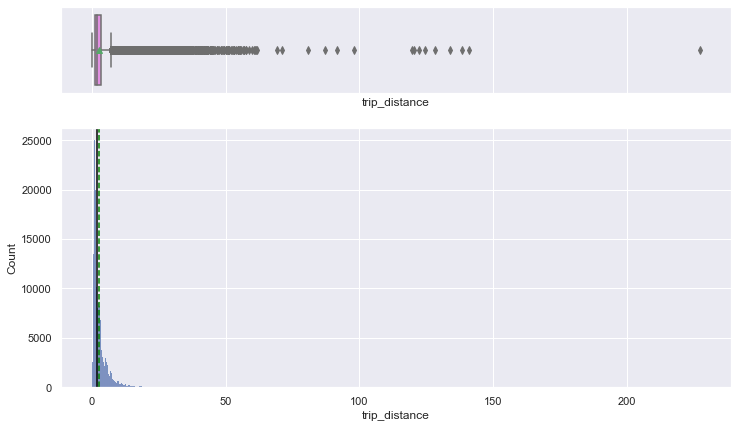

<IPython.core.display.Javascript object>

In [334]:
histogram_boxplot(data, "trip_distance")

* Histogram (above) of the trip distance shows the highly skewed distribution with many higher outliers (highest = 227)
* Majority of the trip distance values are less than 1 mile
* Mean (2.86 miles)  is shown in green color, and Median (1.87)  shown in black color 

## Bivariate Analysis

### Question 3. Report Mean and Median trip distance grouped by hour of day

In [335]:
## Calculate mean Trip Distance (Pickup and Dropoff)  grouped by hour
mean_dist_pickup = data["trip_distance"].groupby(data["pu_hour"]).mean()
mean_dist_dropoff = data["trip_distance"].groupby(data["do_hour"]).mean()

## Calculate median Trip Distance (Pickup and Dropoff)  grouped by hour
median_dist_pickup = data["trip_distance"].groupby(data["pu_hour"]).median()
median_dist_dropoff = data["trip_distance"].groupby(data["do_hour"]).median()

# Create a dataframe data2 to store this values
data2 = pd.concat([mean_dist_pickup, mean_dist_dropoff,
                median_dist_pickup, median_dist_dropoff], axis=1)
data2.columns = ['mean_dist_pickup', 'mean_dist_dropoff',
              'median_dist_pickup', 'median_dist_dropoff']
data2


,mean_dist_pickup,mean_dist_dropoff,median_dist_pickup,median_dist_dropoff
0,3.087760,3.227831,2.100,2.17
1,2.956130,3.081391,2.040,2.10
2,3.035907,3.107419,2.100,2.18
3,3.182557,3.209297,2.200,2.22
4,3.474792,3.433361,2.370,2.40
5,4.074117,4.051093,2.785,2.80
6,3.882630,3.870023,2.700,2.60
7,3.054220,2.996256,1.990,1.90
8,2.844839,2.710371,1.800,1.72
9,2.800926,2.804308,1.790,1.80


<IPython.core.display.Javascript object>

### Plotting the diagram, based on the Mean and Median of trip_distance , hourly.

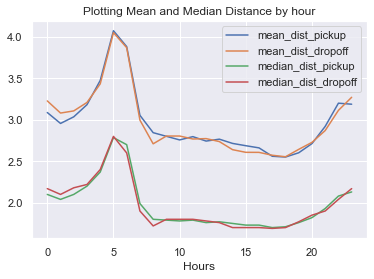

<IPython.core.display.Javascript object>

In [336]:
data2.plot(title="Plotting Mean and Median Distance by hour")
plt.xlabel("Hours")
plt.show()

Observation 
* The Mean values for Trip Distances against pickup and dropoff hours forms a similar pattern, without much deviation
* Similalry Median values for Trip Distances against pickup and dropoff hours forms a similar pattern, without much deviation as well.
* The Mean and Median values peak around 5 AM, then comes down, till around 16 hours and slowly picks up upto midnight.
* Mean values are reported higher than Median values for both Pickup and Dropoff
* From this we can infer that the distribution of Trip Distance is positively skewed.(skewed to the right)
* The trip distance has many outliers as we saw the univariate analysis, and this is reason for skewness.


### Other Bivariate Analysis on Trip Distance

### Trip Distance vs Vendor_Name

<AxesSubplot:xlabel='Vendor_Name', ylabel='trip_distance'>

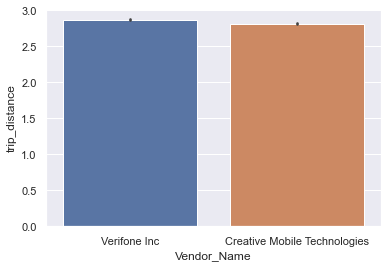

<IPython.core.display.Javascript object>

In [337]:
sns.barplot(x="Vendor_Name", y="trip_distance", data=data)

Observation
* Trip Distances are more or less similar when comparing the Vendors (Verifone and Creative Mobile)

### Trip Distance vs Passenger Count

<AxesSubplot:xlabel='passenger_count', ylabel='trip_distance'>

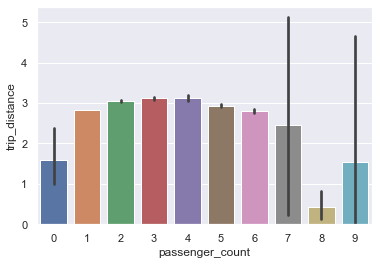

<IPython.core.display.Javascript object>

In [338]:
# Trip distance per passenger count
sns.barplot(x="passenger_count", y="trip_distance", data=data)

Observation
* Trip Distances are mostly high (around 3 miles) when passenger counts are between 1-6
* We have some data with passenger count as 0 , need to analyze further to see if it is a data error.
* Passenger Counts 7 or more have many outliers, so the distribution is not uniform. (shown by error bars)

### Trip Distance vs Trip Type

<AxesSubplot:xlabel='Trip_Type_Desc', ylabel='trip_distance'>

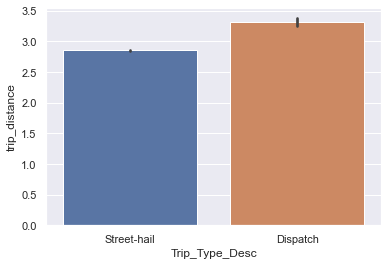

<IPython.core.display.Javascript object>

In [339]:
sns.barplot(x="Trip_Type_Desc", y="trip_distance", data=data)

Observation
* Dispatched trips go for a higher trip distance compared to Street Hailed ones

### Trip Distance vs Rate Code

<AxesSubplot:xlabel='Rate_Code', ylabel='trip_distance'>

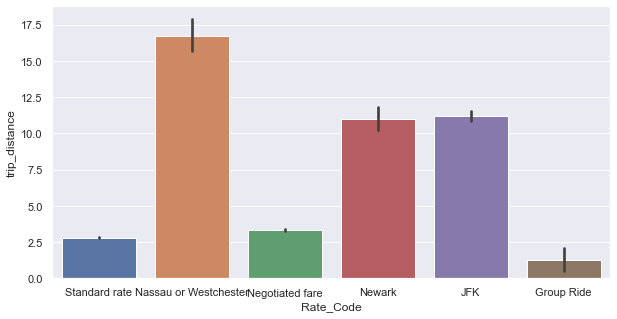

<IPython.core.display.Javascript object>

In [340]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Rate_Code", y="trip_distance", data=data)

Observation
* Nassau or Westchester Rate Codes tend to have higher trip distances, closely followed by Newark and JFK 

### Trip Distance vs PaymentType

<AxesSubplot:xlabel='Payment_Type_Desc', ylabel='trip_distance'>

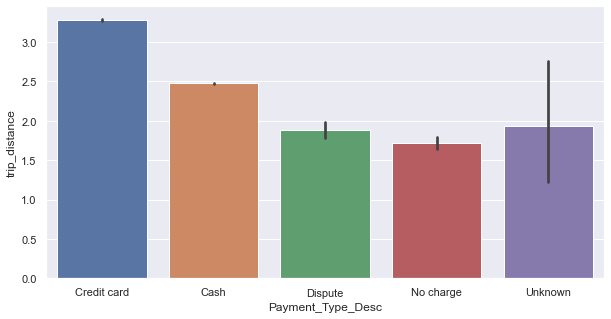

<IPython.core.display.Javascript object>

In [341]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Payment_Type_Desc", y="trip_distance", data=data)

Observation
* Trip Distances are highest for Credit Card , closely followed by Cash.

### Correlation between variables (Multivariate Analysis)

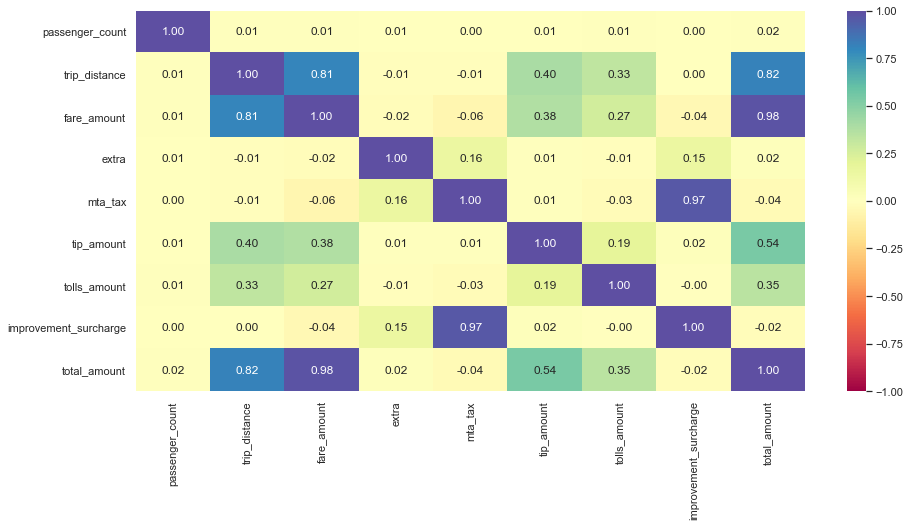

<IPython.core.display.Javascript object>

In [342]:
data3 = data[
    [
        "passenger_count",
        "trip_distance",
        "fare_amount",
        "extra",
        "mta_tax",
        "tip_amount",
        "tolls_amount",
        "improvement_surcharge",
        "total_amount",
    ]
]
plt.figure(figsize=(15, 7))
sns.heatmap(data3.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation
 ~We can see High positive corelation between 
* fare_amount and total_amount
* mta_tax and improvement_surcharge
* fare_amount and trip_distance


## 4. Insights based on Analysis

NYC Green taxi data for Sep 2016, has 148574 rows and 19 columns.

-- Following are the significant insights from the dataset, primarly focussed on trip distance feature.

* There are 109 Duplicated rows
* ehail_fee column is NULL for all the rows in the dataset.
* There are amounts columns which are negative, which needs further investigation.
* There are rows for which passenger counts =0  , which also needs investigation.
* Trip Distance has 14769 rows mentioned as 0 miles, which could be due to rounding or data errors (also needs investigation)
* Histogram  of the trip distance shows the highly skewed distribution with many higher outliers (highest = 227). This may need outlier treatments.
* Majority of the trip distance values are less than 1 mile
* Trip Distances are more or less similar when comparing the Vendors (Verifone and Creative Mobile)
* Trip Distances are mostly high (around 3 miles) when passenger counts are between 1-6
* We have some data with passenger count as 0 , need to analyze further to see if it is a data error.
* Passenger Counts 7 or more have many outliers, so the distribution is not uniform. (shown by error bars).
* Dispatched trips go for a higher trip distance compared to Street Hailed ones
* Nassau or Westchester Rate Codes tend to have higher trip distances, closely followed by Newark and JFK.
* Trip Distances are highest for Credit Card , closely followed by Cash.
* New features can be introduced in the dataset, for the time duration,  calculated from Drop Off and Pickup time, which can be helpful in the analysis.
* Some of the highly correlated variables can be dropped, during modelling exercise.
